<a href="https://colab.research.google.com/github/botir2/Agro-research/blob/main/TMZ_YOLOv9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/WongKinYiu/yolov9.git

fatal: destination path 'yolov9' already exists and is not an empty directory.


Step 02: Change Current Directory

In [5]:
%cd yolov9

/content/yolov9


Step 03: Install All the Required Packages

In [1]:
!pip install -r requirements.txt -q

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Step 04: Download the Model Weights


NOTE: In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.


In [7]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


In [8]:
!mkdir -p {HOME}/weights

In [9]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [10]:
!ls -la {HOME}/weights

total 237676
drwxr-xr-x  2 root root      4096 Mar 22 22:39 .
drwxr-xr-x 13 root root      4096 Mar 22 22:39 ..
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


Step 05: Download the Dataset from Roboflow

In [11]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


Step 06: Train Custom Model

In [ ]:
%cd yolov9

/content/yolov9


In [ ]:
!python train_dual.py --workers 8 --device 0 --batch 8 --data '/content/PPE_Detection-2' --img 640 --cfg models/detect/yolov9-e.yaml --weights '{HOME}/weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 30 --close-mosaic 15


2024-03-22 19:22:26.797710: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 19:22:26.797766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 19:22:26.799785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 19:22:28.278705: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights={HOME}/weights/yolov9-e.pt, cfg=models/detect/yolov9-e.yaml, data=/content/PPE_Detection-2, hyp=hyp.scratch-high.yaml, epochs=30, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=

In [ ]:
ls


benchmarks.py   export.py   panoptic/         segment/         utils/
classify/       figure/     __pycache__/      tools/           val_dual.py
data/           hubconf.py  README.md         train_dual.py    val.py
detect_dual.py  LICENSE.md  requirements.txt  train.py         val_triple.py
detect.py       models/     scripts/          train_triple.py  weights/


In [ ]:
pwd

'/content/yolov9'

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3GWM0LYrp77wlcs1M5vV")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov9")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov9:: 100%|██████████| 6472/6472 [00:02<00:00, 2681.25it/s]


In [3]:
%cd yolov9

/content/yolov9


In [4]:
pwd


'/content/yolov9'

In [8]:
!python train_dual.py --workers 8 --device 0 --batch 8 --data '/content/yolov9/PPE_Detection-2' --img 640 --cfg models/detect/yolov9-e.yaml --weights '/content/yolov9/weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 30 --close-mosaic 15


2024-03-22 22:41:59.005317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 22:41:59.005380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 22:41:59.007043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 22:42:00.375926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/yolov9/weights/yolov9-e.pt, cfg=models/detect/yolov9-e.yaml, data=/content/yolov9/PPE_Detection-2, hyp=hyp.scratch-high.yaml, epochs=30, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=Fals

Download Weights From the Drive

In [ ]:
!gdown "https://drive.google.com/uc?id=140oaWpcxsbZM9glqzeUYHR5gQT_wERX6&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=140oaWpcxsbZM9glqzeUYHR5gQT_wERX6&confirm=t
To: /content/yolov9/best.pt
100% 140M/140M [00:03<00:00, 44.4MB/s]


Step 07: Examine Training Results

NOTE: By default, the results of each subsequent training sessions are saved in {HOME}/yolov9/runs/train/, in directories named exp, exp2, exp3, ... You can override this behavior by using the --name parameter.

In [9]:
!ls /content/yolov9/runs/train/yolov9-e-finetuning2

ls: cannot access '/content/yolov9/runs/train/yolov9-e-finetuning2': No such file or directory


In [ ]:
from IPython.display import Image

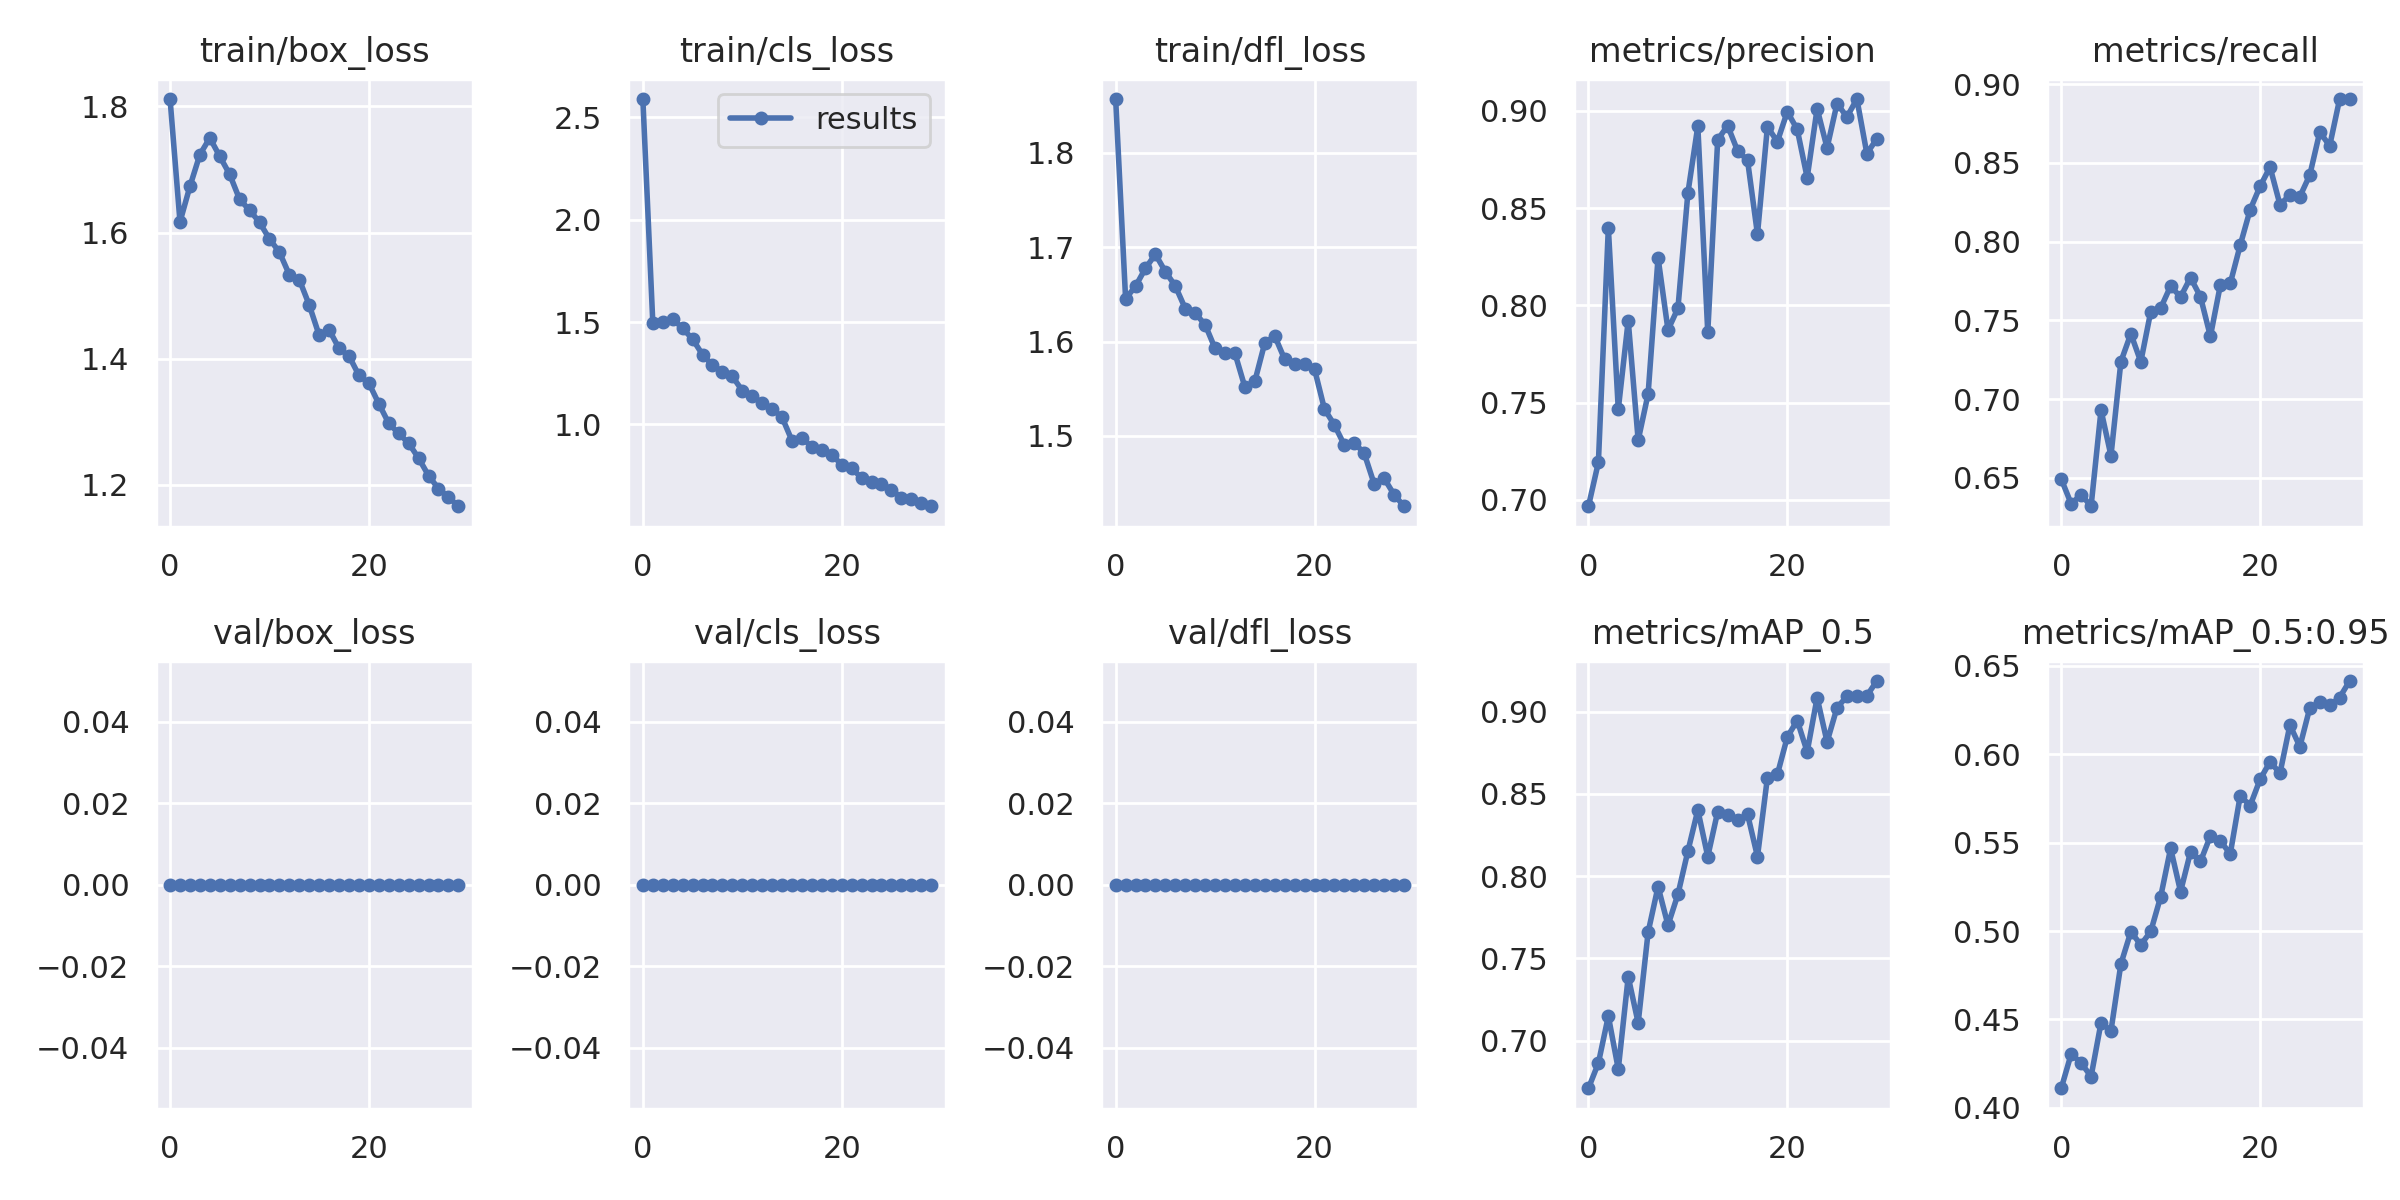

In [ ]:
Image(filename=f"/content/yolov9/runs/train/yolov9-e-finetuning2/results.png", width=1000)

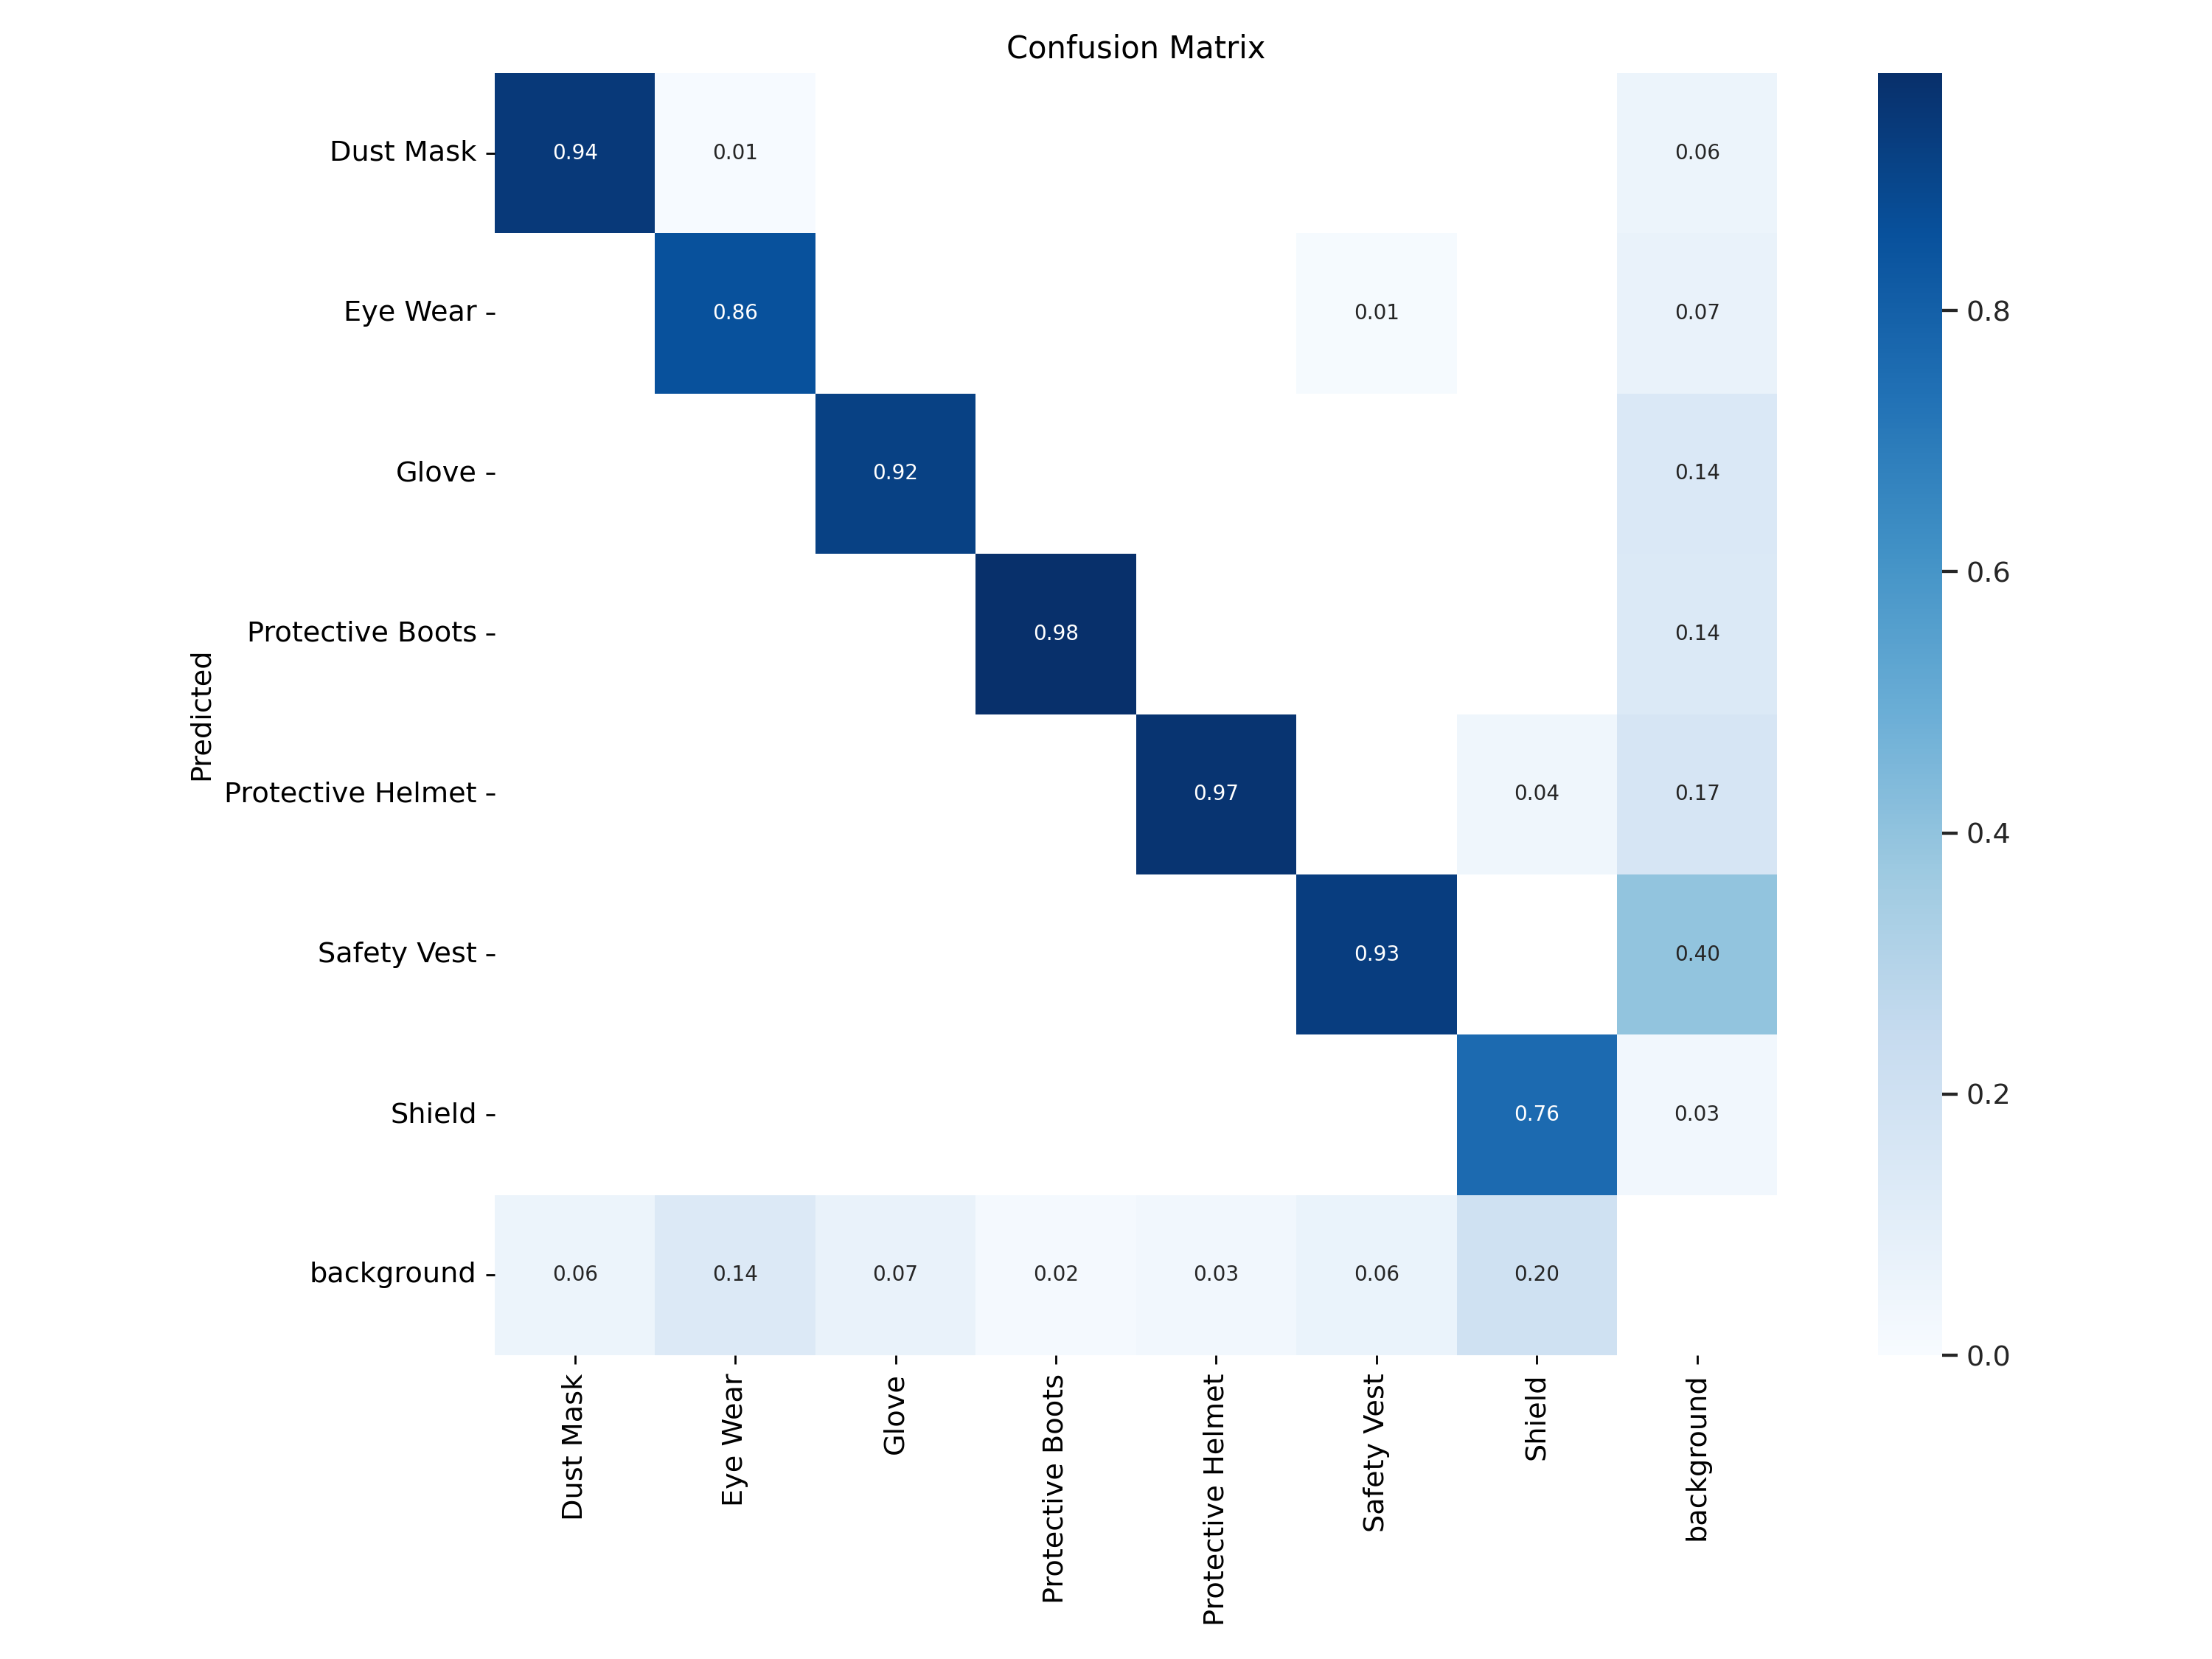

In [ ]:
Image(filename=f"/content/yolov9/runs/train/yolov9-e-finetuning2/confusion_matrix.png", width=1000)

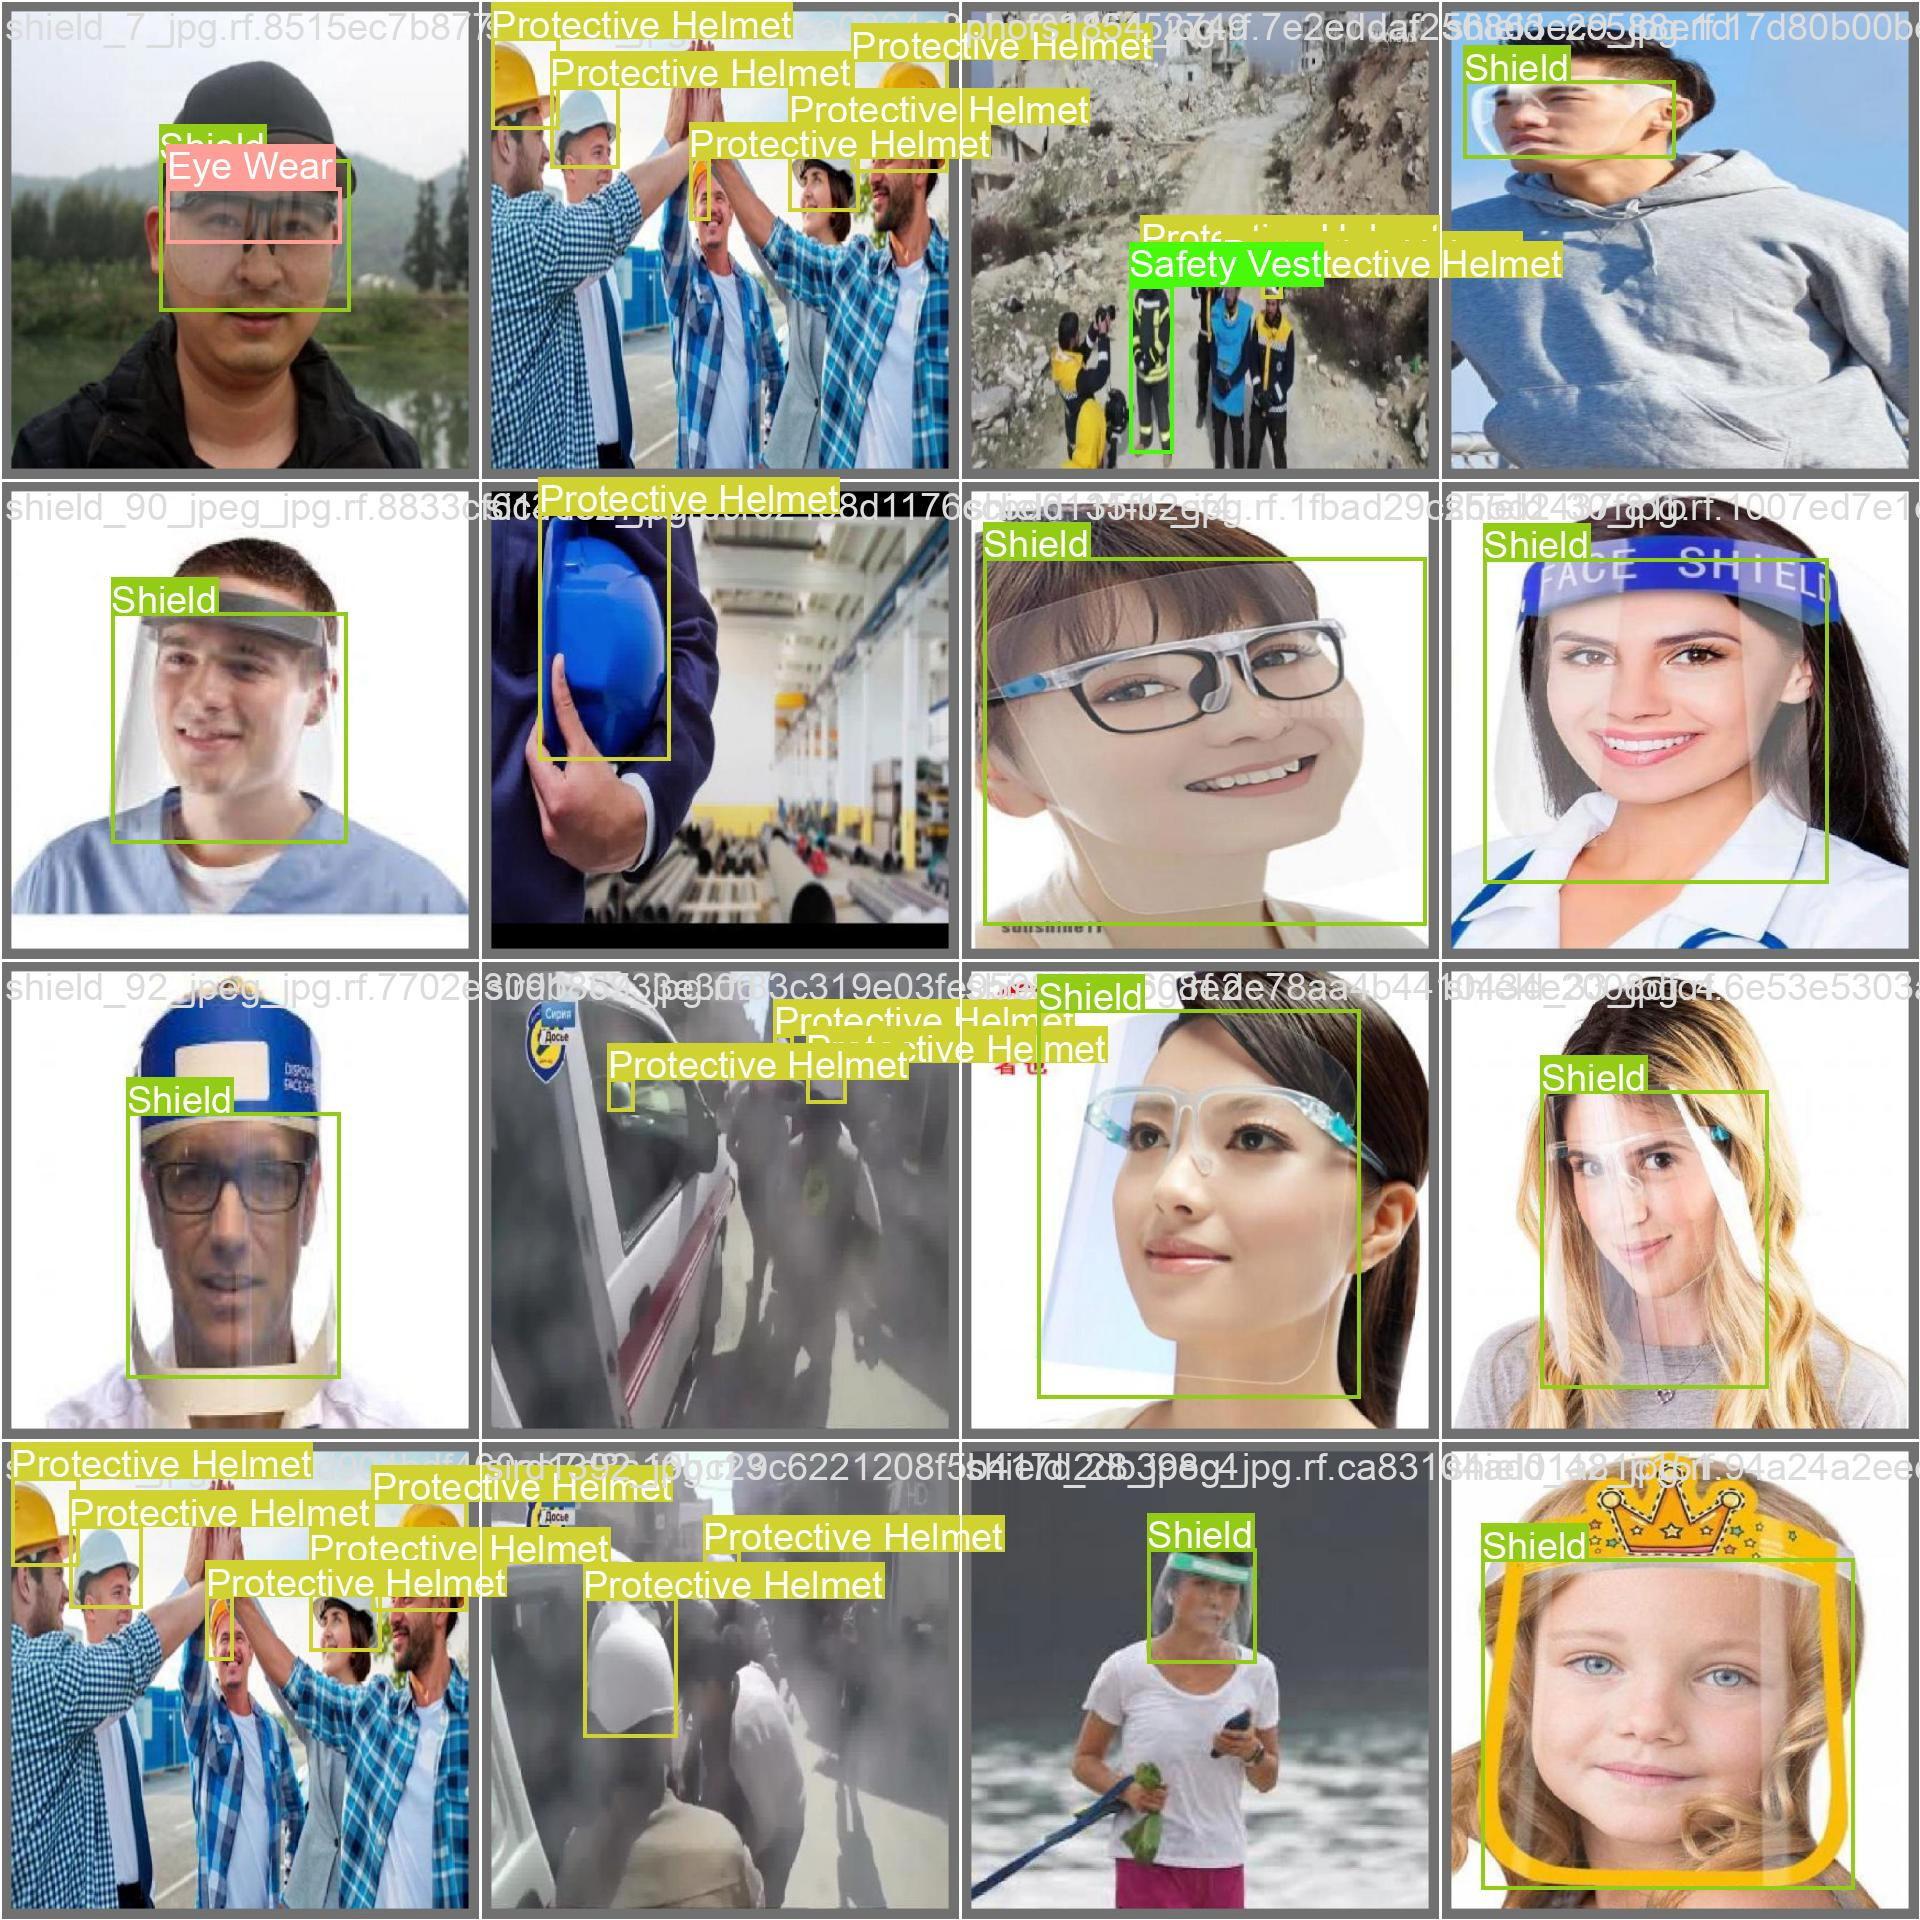

In [ ]:
Image(filename=f"/content/yolov9/runs/train/yolov9-e-finetuning2/val_batch0_labels.jpg", width=1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
